# Compressive Sensing / Basis Pursuit Denoising Notebook

In [1]:
import numpy as np

from scipy.stats import norm, uniform
from scipy.optimize import minimize
from matplotlib import pyplot as plt

Random indices are:  [57 65 80 85]
Indices of nonzero: [57 65 80 85 96]
Recovered x indices match created?  [[ True  True  True  True False]]


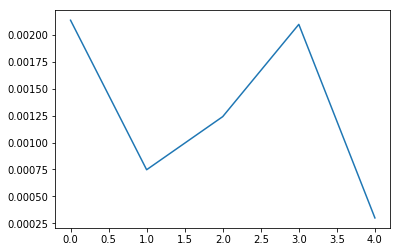

In [2]:
# measurements, unknowns, sparsity. n>>m
m, n, k = 20, 100, 4
# Can experiment with different sizes (harder for larger ks) and different A values, different pfs

# Create GRN populated matrix with a random seed, to check results
#A = norm.rvs(size = (m,n)) #, random_state = 1436)
A = np.random.randint( -1, 2, size = (m,n)) #random 1s and -1s

# Create x with nx1 values
x1 = np.zeros(n)
# Set 3 of elements to nonzero values (random) (test with different number of elements nonzero, different sizes)
random_indices = uniform.rvs(scale = x1.size, size = k, random_state = 838) #these are random indices to set
print('Random indices are: ', np.sort(random_indices.astype(int)))
x1[random_indices.astype(int)] = uniform.rvs(loc = -2, scale = 4, size = k, random_state = 842)
# print('Randomly populated x: ', x1)
# Dot product of A and x (to get y)
y = np.dot(A, x1)

# penalty factor lambda
pf = .1

# Try manual recovery instead
def fun(x, A = A, y = y, pf = pf) : 
    return np.square(np.linalg.norm(np.dot(A, x) - y)) + .5*pf*np.linalg.norm(x, ord = 1)
x = minimize(fun, x0 = np.zeros(n)).x
x = np.round(x, decimals = 4).astype(float)
# print('Recovered x: ', x) #should be nx1

print('Indices of nonzero:', np.nonzero(x)[0])
print('Recovered x indices match created? ', np.isin(np.nonzero(x), np.nonzero(x1)))
diff = abs(x1-x)
# print('Difference(error) in indices: ', 
plt.plot(diff[np.nonzero(diff)[0]])
plt.show()

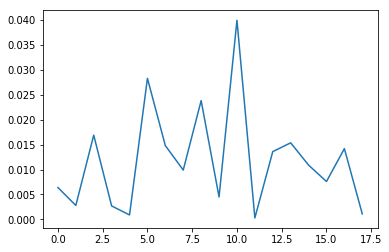

In [3]:
# Same as above, with noise:
# Add noise to x, y, or A, representing noise in different physical areas (ADCs versus in measurement versus in matrix)

# noise in x (worse than noise in y when tested)
# xnoise = x1 + np.random.normal(0, .3, n)
# y_corrupted = np.dot(A, xnoise)
# noise in y (not as bad as noise in x when tested)
y_corrupted = y + np.random.normal(0, .05, m)

# A = A + np.random.normal(0, .3, size = (m,n))
def fun(x, A = A, y = y_corrupted, pf = pf) : 
    return np.square(np.linalg.norm(np.dot(A, x) - y)) + .5*pf*np.linalg.norm(x, ord = 1)
x_rec = minimize(fun, x0 = np.zeros(n)).x
x_rec = np.round(x_rec, decimals = 4).astype(float)

# print('Indices of nonzero:', np.nonzero(x_rec)[0])
# print('Recovered x indices match created? ', np.isin(np.nonzero(x_rec), np.nonzero(x1)))
diff = abs(x_rec-x1)
plt.plot(diff[np.nonzero(diff)[0]])
plt.show()
# From this we can see if the analysis is resilient to noise in x and therefore y